In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv("/Users/auliaazmi/Downloads/heart.csv", sep=";")

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.03,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.05,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.04,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.08,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.06,2,0,2,1


## Exploratory Data Analysis

In [18]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,0.79,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.08,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.08,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.06,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.02,2.00,4.00,3.00,1.00


<AxesSubplot:>

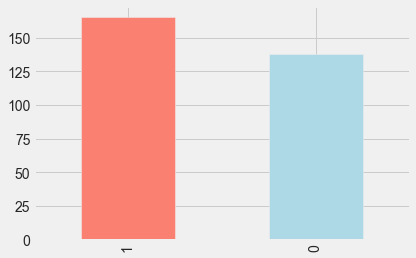

In [19]:
df.target.value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [20]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

We have 165 people with heart disease and 138 people without heart disease, meaning that our data is relatively balanced; not biased

In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [23]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [24]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

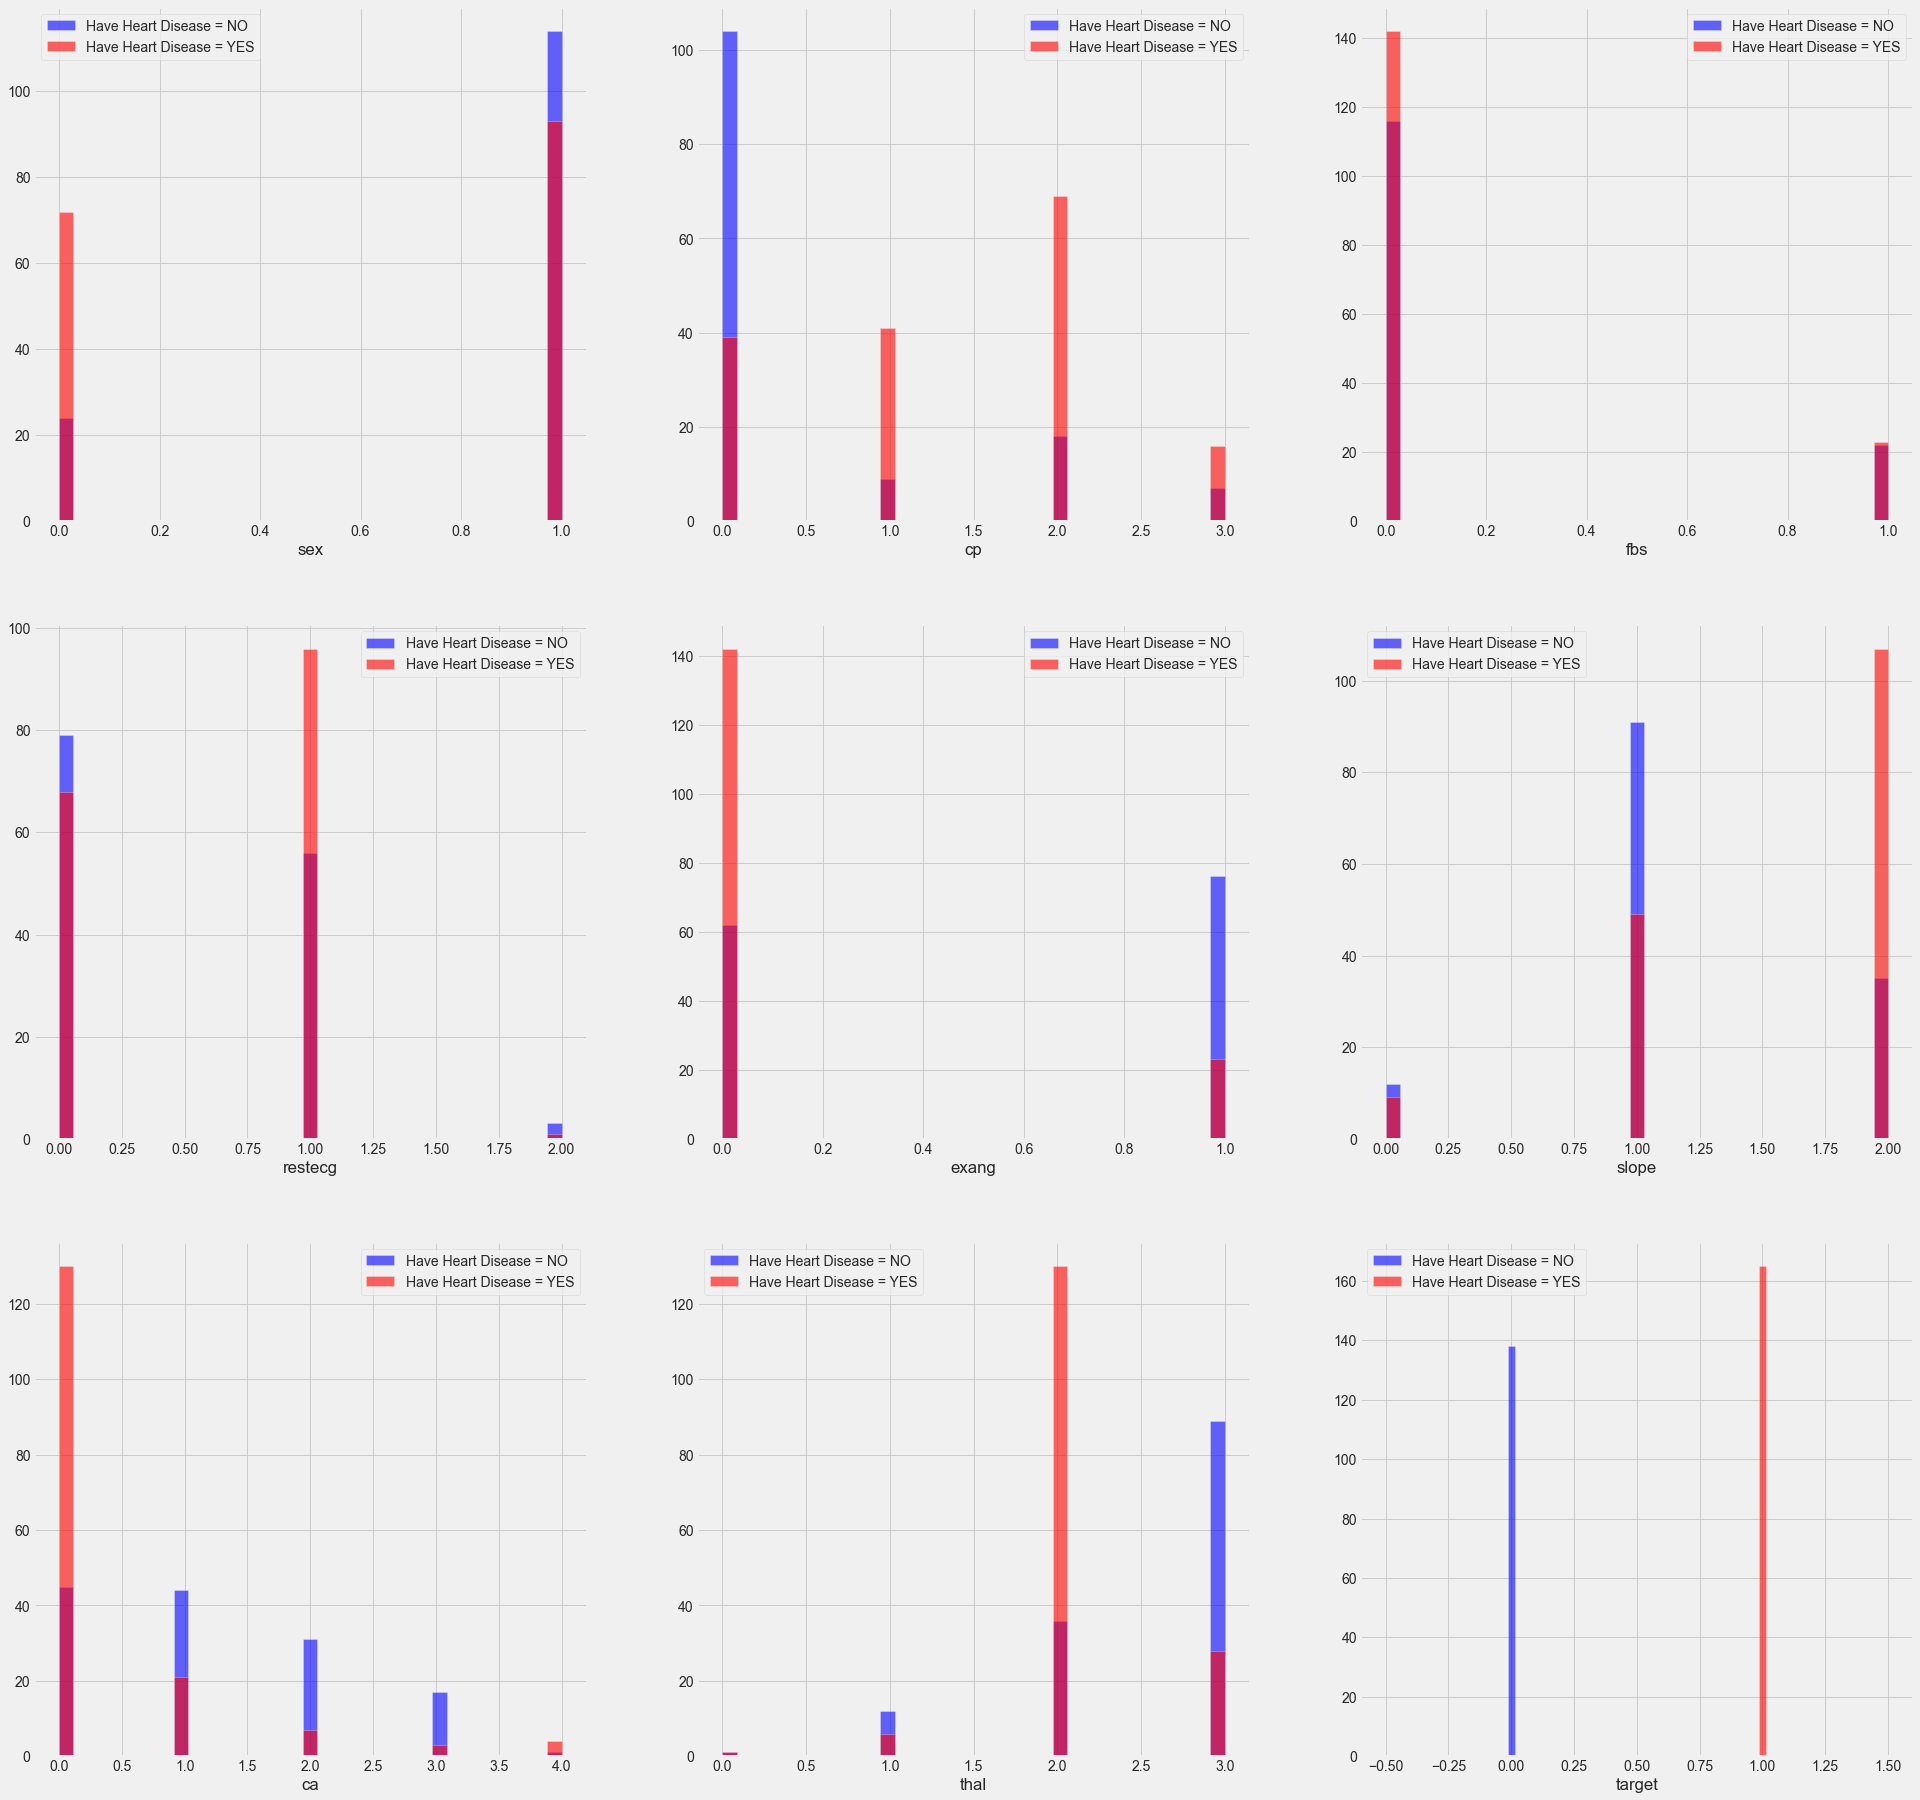

In [26]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.

restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)

slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

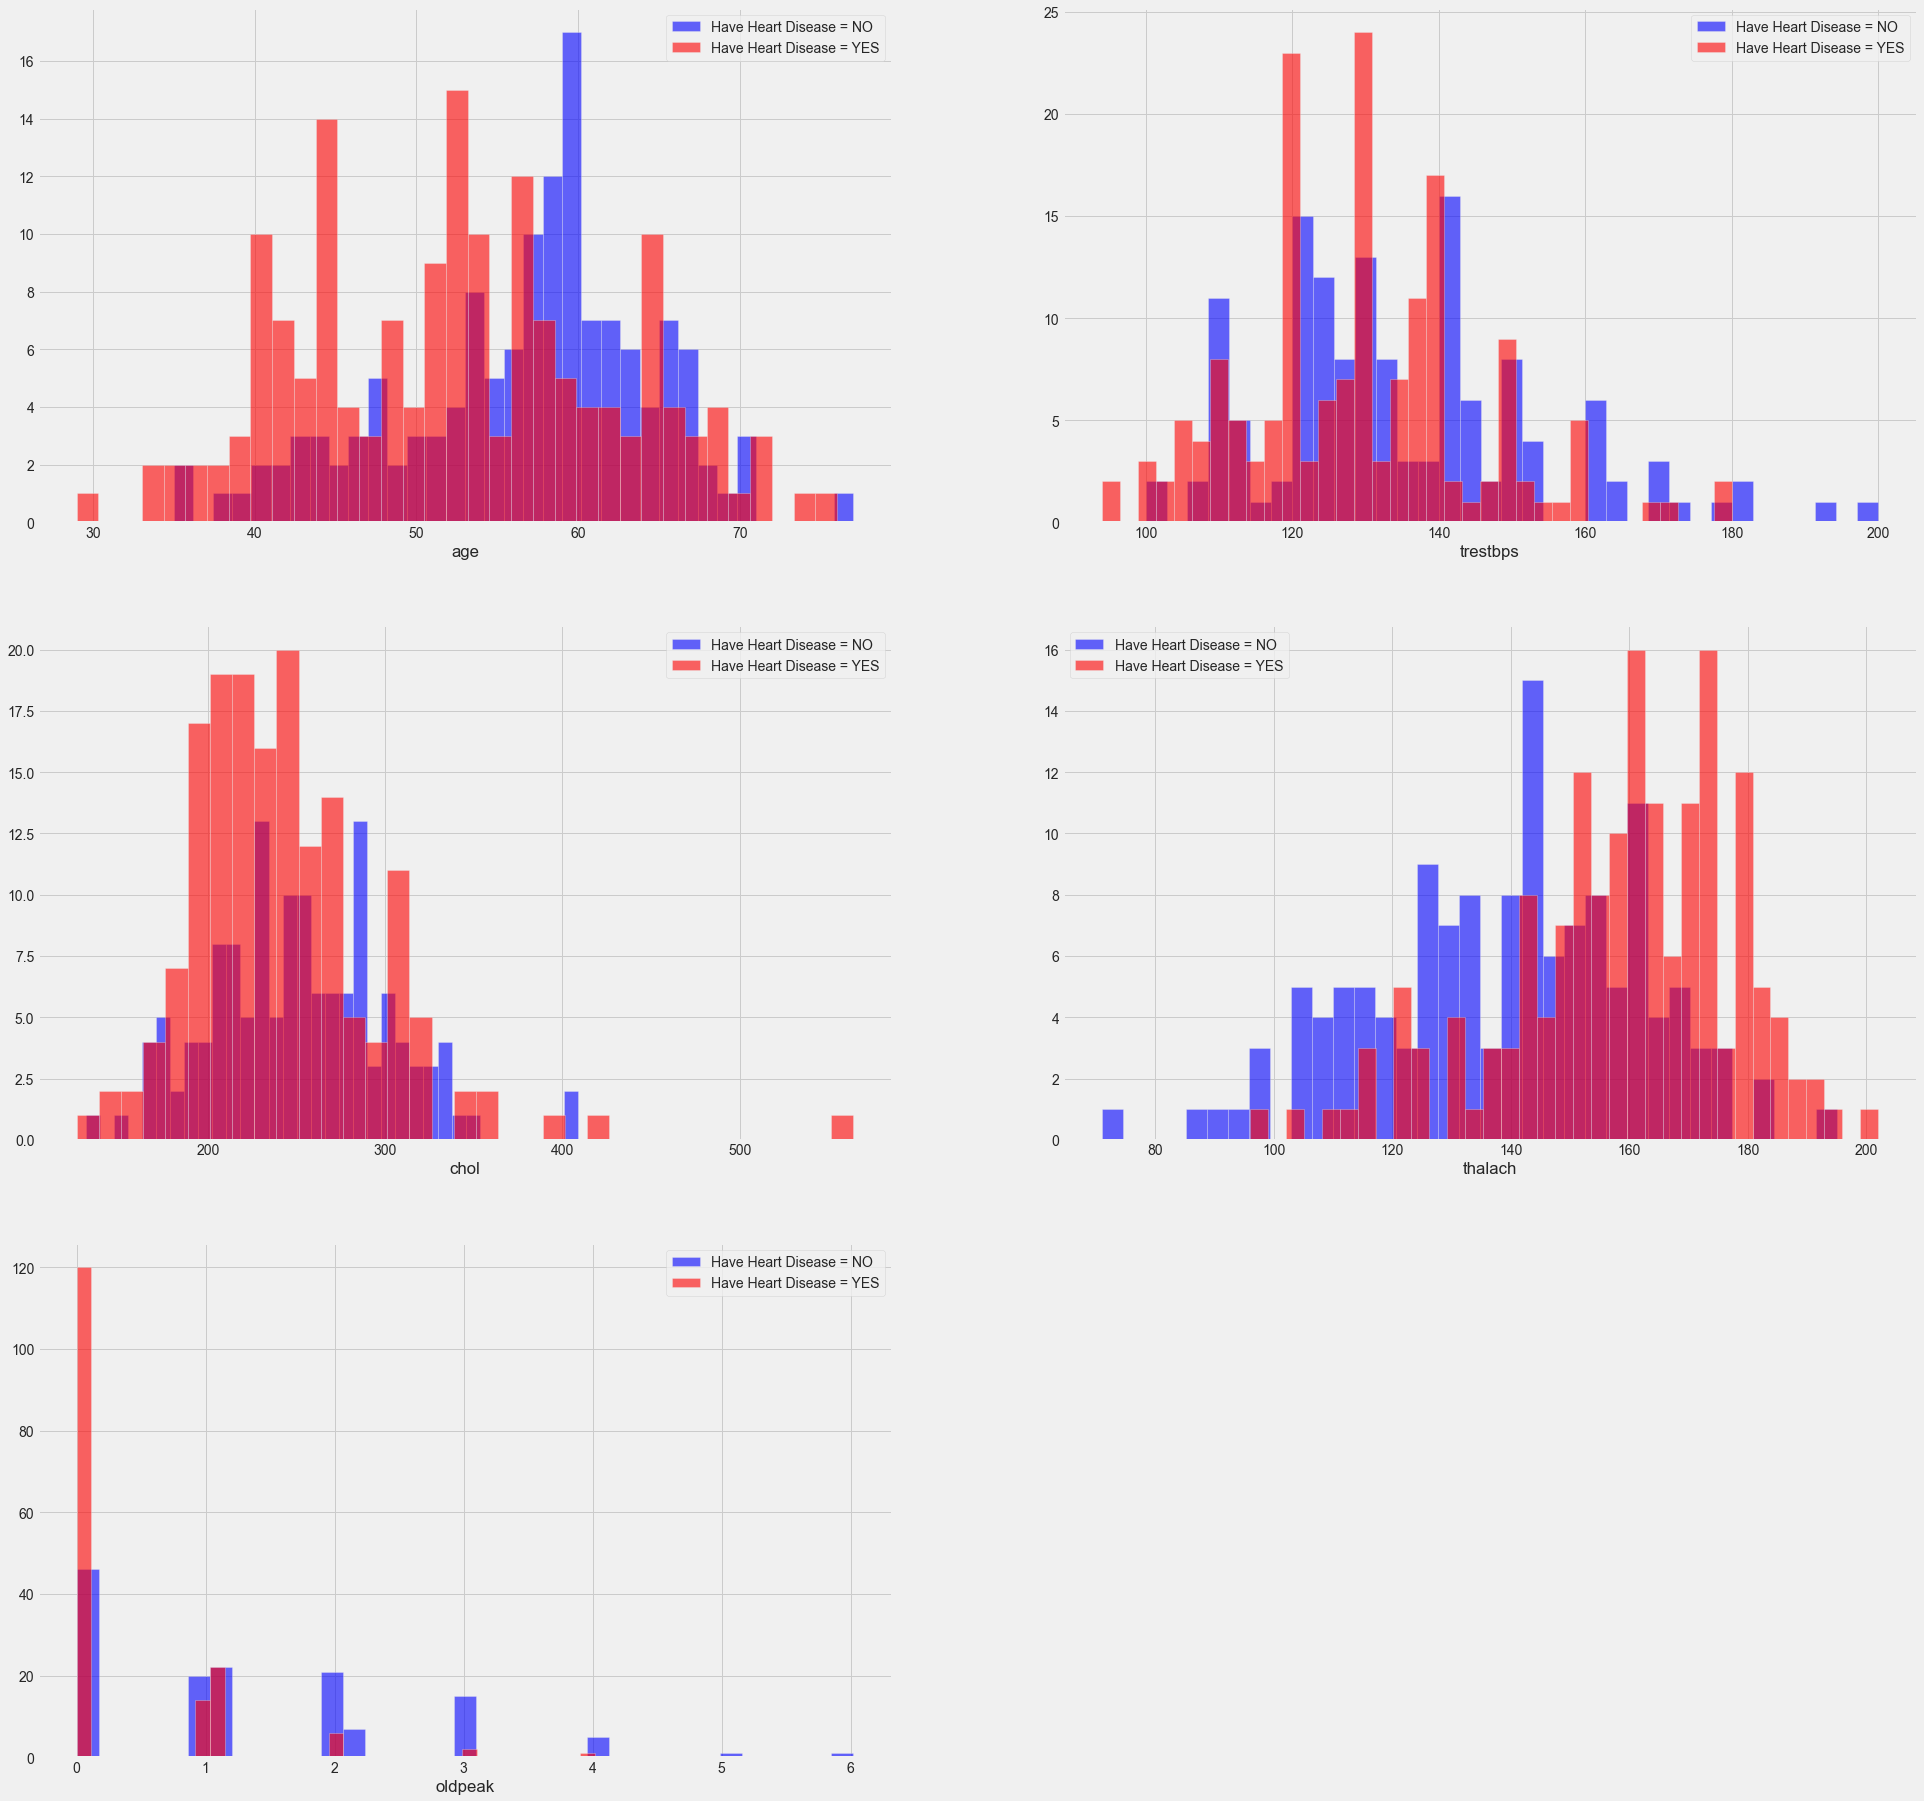

In [28]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

trestbps: resting blood pressure anything above 130-140 is generally of concern
chol: greater than 200 is of concern.

thalach: People with a maximum of over 140 are more likely to have heart disease.

the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

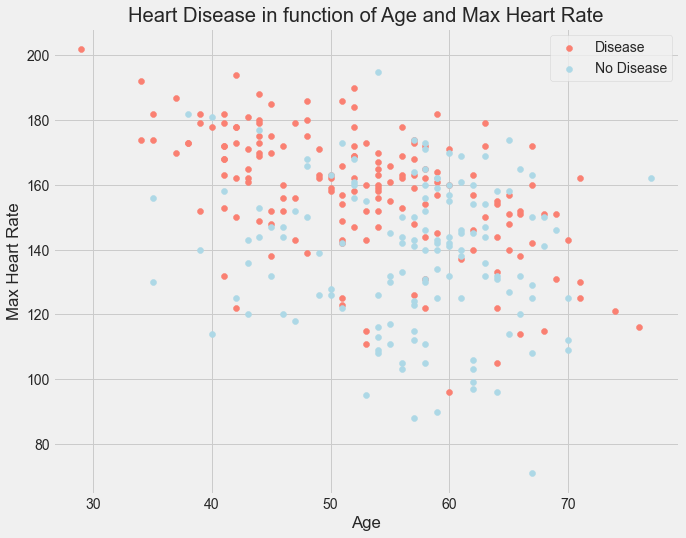

In [29]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## Correlation Matrix

(14.5, -0.5)

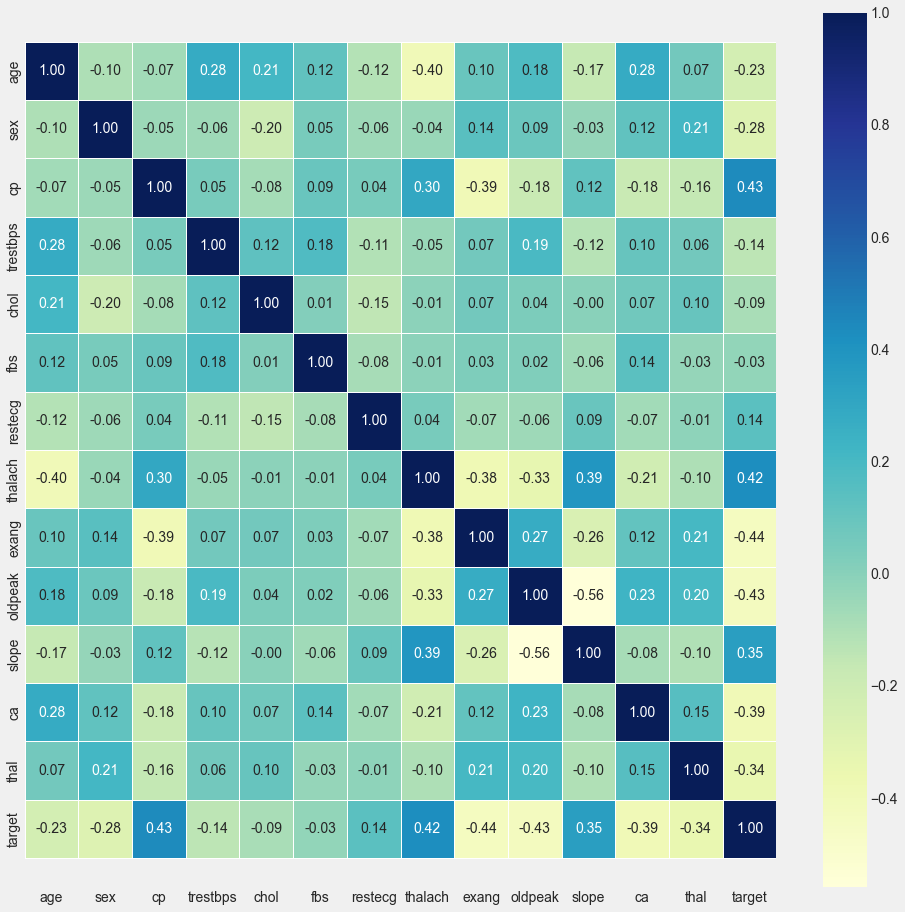

In [30]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

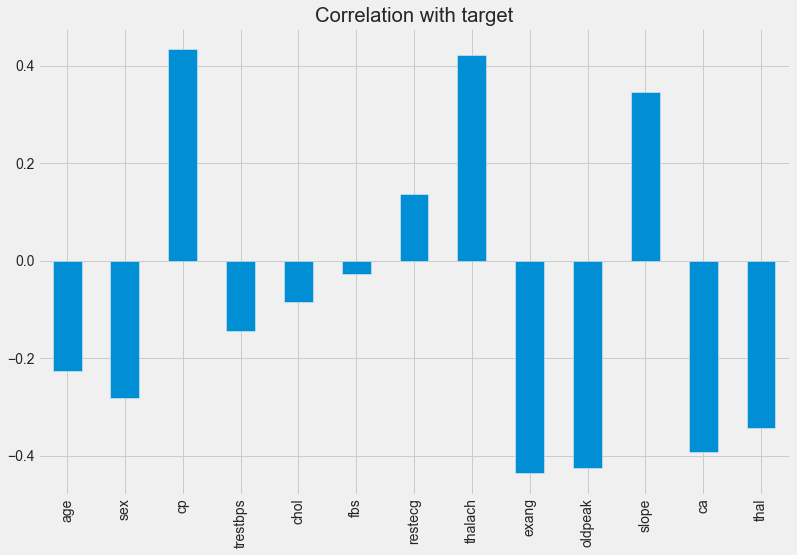

In [31]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

Observations from correlation:

fbs and chol are the least correlated with the target variable.

All other variables have a significant correlation with the target variable.

## Data Preprocessing

In [33]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

## Pre-Training

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")


In [36]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.74%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.89   0.87      0.88       0.88          0.88
recall     0.84   0.91      0.88       0.87          0.88
f1-score   0.86   0.89      0.88       0.88          0.88
support   97.00 115.00      0.88     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 81  16]
 [ 10 105]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________


In [38]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.74,86.81


## SVM

In [39]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


print_score(svm_linear, X_train, y_train, X_test, y_test, train=True)
print_score(svm_linear, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.26%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.87      0.87       0.87          0.87
recall     0.84   0.90      0.87       0.87          0.87
f1-score   0.86   0.89      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 81  16]
 [ 11 104]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.85  0.85      0.85       0.85          0.85
recall     0.80  0.88      0.85       0.84          0.85
f1-score   0.83  0.86      0.85       0.84          0.85
support   41.00 50.00      0.85      91.00         91.00
_______________________________________________


In [66]:
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8461538461538461
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [41]:
from sklearn.svm import SVC

svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)


print_score(svm_poly, X_train, y_train, X_test, y_test, train=True)
print_score(svm_poly, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.75%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.97   0.95      0.96       0.96          0.96
recall     0.94   0.97      0.96       0.96          0.96
f1-score   0.95   0.96      0.96       0.96          0.96
support   97.00 115.00      0.96     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 91   6]
 [  3 112]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.85  0.86      0.86       0.86          0.86
recall     0.83  0.88      0.86       0.85          0.86
f1-score   0.84  0.87      0.86       0.86          0.86
support   41.00 50.00      0.86      91.00         91.00
_______________________________________________


In [65]:
y_pred = svm_poly.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8571428571428571
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



In [43]:
from sklearn.svm import SVC

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)


print_score(svm_sigmoid, X_train, y_train, X_test, y_test, train=True)
print_score(svm_sigmoid, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.19%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.81   0.80      0.80       0.80          0.80
recall     0.74   0.85      0.80       0.80          0.80
f1-score   0.77   0.82      0.80       0.80          0.80
support   97.00 115.00      0.80     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[72 25]
 [17 98]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.85  0.88      0.87       0.87          0.87
recall     0.85  0.88      0.87       0.87          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________


In [64]:
y_pred = svm_sigmoid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8681318681318682
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [44]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)


print_score(svm_rbf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_rbf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.45%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.93   0.92      0.92       0.92          0.92
recall     0.91   0.94      0.92       0.92          0.92
f1-score   0.92   0.93      0.92       0.92          0.92
support   97.00 115.00      0.92     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 88   9]
 [  7 108]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.84  0.90      0.87       0.87          0.87
recall     0.88  0.86      0.87       0.87          0.87
f1-score   0.86  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________


In [63]:
y_pred = svm_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8681318681318682
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.90      0.86      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



            Train       Test
linear      87.26       84.62
rbf         92.45       86.81
sigmoid     80.19       86.81
poly        95.75       85.71

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {'n_neighbors': range(1, 31)}

knn = KNeighborsClassifier(n_neighbors=3)
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 4}
Best score: 0.8301218161683279


In [60]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.82   0.91      0.87       0.87          0.87
recall     0.91   0.83      0.87       0.87          0.87
f1-score   0.86   0.87      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[88  9]
 [19 96]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.69  0.87      0.77       0.78          0.79
recall     0.88  0.68      0.77       0.78          0.77
f1-score   0.77  0.76      0.77       0.77          0.77
support   41.00 50.00      0.77      91.00         91.00
_______________________________________________


In [62]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.7692307692307693
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77        41
           1       0.87      0.68      0.76        50

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91



## Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print_score(svm_rbf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_rbf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 92.45%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.93   0.92      0.92       0.92          0.92
recall     0.91   0.94      0.92       0.92          0.92
f1-score   0.92   0.93      0.92       0.92          0.92
support   97.00 115.00      0.92     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 88   9]
 [  7 108]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.84  0.90      0.87       0.87          0.87
recall     0.88  0.86      0.87       0.87          0.87
f1-score   0.86  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________


In [59]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification report:\n", report)

Accuracy: 0.6703296703296703
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.90      0.71        41
           1       0.86      0.48      0.62        50

    accuracy                           0.67        91
   macro avg       0.72      0.69      0.66        91
weighted avg       0.74      0.67      0.66        91



## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification report:\n", report)

Accuracy: 0.7912087912087912
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



## Random Forrest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.7692307692307693
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77        41
           1       0.87      0.68      0.76        50

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91

